In [5]:
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/Users/indiram/ASI/src/data/F10.7.csv')
df.head()

,Date,Time,Julian day,Carringtonrotation,Observed Flux,Adjusted Flux,URSI Flux
0,2004-10-28,17:00:00,2453307.229,2022.605,132.7,130.9,117.8
1,2004-10-28,20:00:00,2453307.354,2022.610,135.8,134.0,120.6
2,2004-10-29,20:00:00,2453308.354,2022.646,130.6,128.8,115.9
3,2004-10-29,23:00:00,2453308.479,2022.651,134.2,132.3,119.1
4,2004-10-30,17:00:00,2453309.229,2022.678,147.9,145.8,131.2


In [7]:
# Assuming df is your DataFrame
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
# Drop the 'Date' and 'Time' columns if you don't need them anymore
df.drop(['Date', 'Time'], axis=1, inplace=True)
# Set the 'DateTime' column as the index
df.set_index('DateTime', inplace=True)


In [8]:
# Create a TimeSeriesSplit object
tss = TimeSeriesSplit(n_splits=6)
X = df.drop(labels=['Adjusted Flux'], axis=1)
y = df['Adjusted Flux']


In [9]:

split_indices = []
plt.figure(figsize=(10, 6))
# Generate and store the split indices
for train_index, test_index in tss.split(X):
    split_indices.append((train_index, test_index))

<Figure size 1000x600 with 0 Axes>

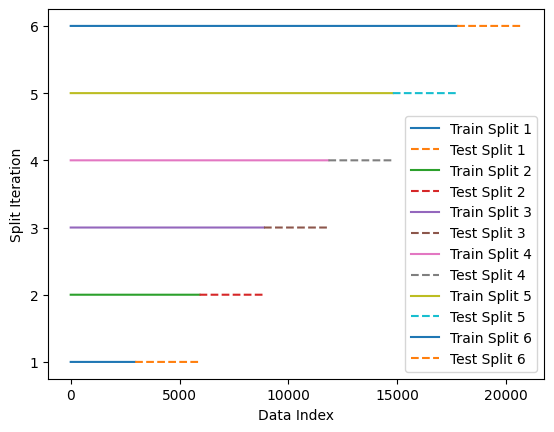

In [10]:

# Plot the training and testing indices
for i, (train_index, test_index) in enumerate(split_indices):
    plt.plot(train_index, [i + 1] * len(train_index), label=f'Train Split {i+1}')
    plt.plot(test_index, [i + 1] * len(test_index), label=f'Test Split {i+1}', linestyle='dashed')

# Add labels and legend
plt.xlabel('Data Index')
plt.ylabel('Split Iteration')
plt.legend()

# Show the plot
plt.show()